In [1]:
#lets import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall_data = pd.read_csv(r"C:\Users\User\Downloads\Mall_Customers.csv")

In [3]:
#print first rows of dataset
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#total rows and columns in dataset
mall_data.shape

(200, 5)

In [5]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#finding null values in dataset
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

<AxesSubplot:>

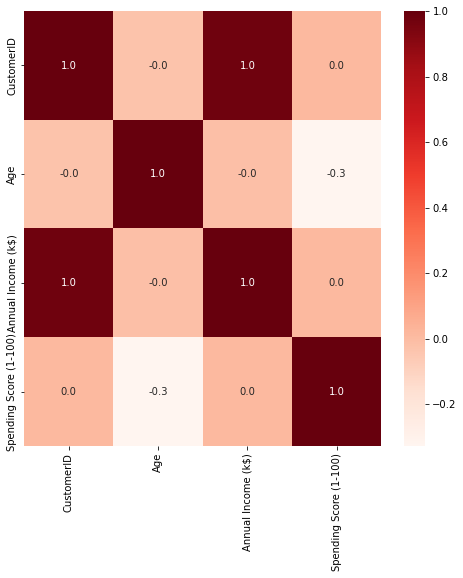

In [11]:
corr = mall_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='Reds',fmt='.1f')

We can see that there's basically no correlation between any of the variables. Just a mild inverse relationship between age and spending score but it's not effective enough for us to consider.

<AxesSubplot:xlabel='Gender', ylabel='count'>

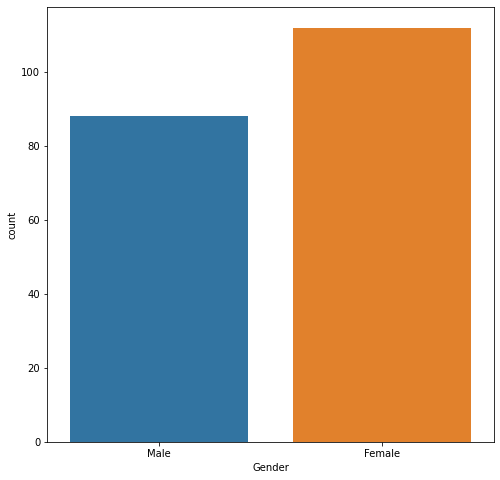

In [12]:
#which gender shops more
plt.figure(figsize=(8,8))
sns.countplot(data=mall_data,x='Gender')

<AxesSubplot:xlabel='Age', ylabel='count'>

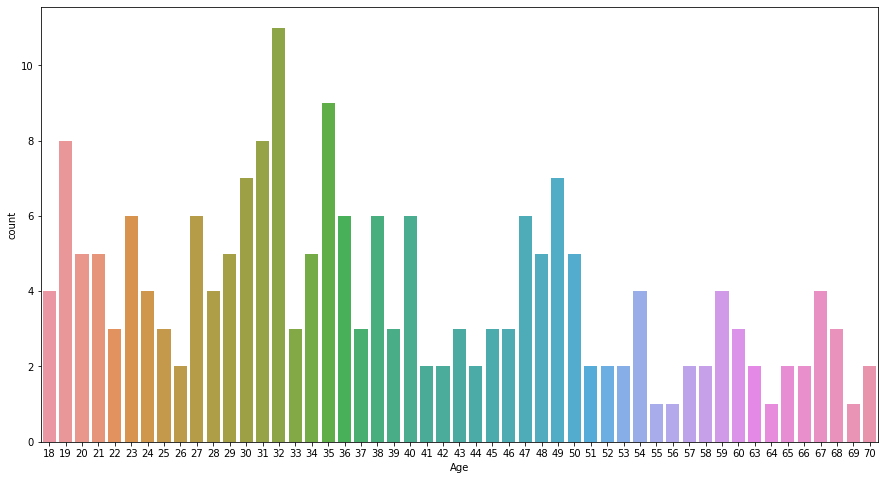

In [15]:
#people with what age shopes more
plt.figure(figsize=(15,8))
sns.countplot(data=mall_data,x='Age')

This illustration tells us that people tend to shop more in their 30s and least in their 60s.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

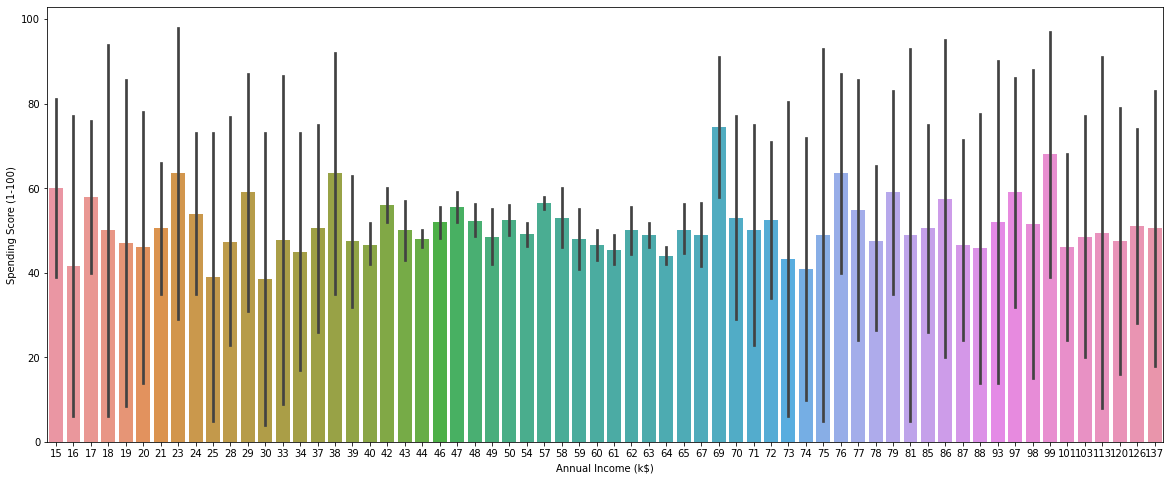

In [17]:
#is there any relation ship with annual income and spending score
plt.figure(figsize=(20,8))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data)

This is very interesting evidence, as one must think that people with higher incomes should shop more but as we can see, people of low incomes tend have very similar shopping frequencies as people of higher incomes but people of mediocre incomes tend to shop much less in comparison.

# Clusters

In [18]:
X = mall_data.iloc[:,[2,3,4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

Now, we need to find the optimal number of clusters for this dataset. To do that, we will use WCSS (within-cluster-sum-of-squares) parameter. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

In [19]:
from sklearn.cluster import KMeans

In [21]:
wcss = []
for i in range(1,11): # It will find wcss value for different number of clusters (for 1 cluster, for 2...until 10 clusters) and put it in our list
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51118.949931647294,
 44637.39564017064,
 40936.763713763714,
 37048.59133348134]

As we can see, 10 clusters have minimum wcss but we need to check elbow points

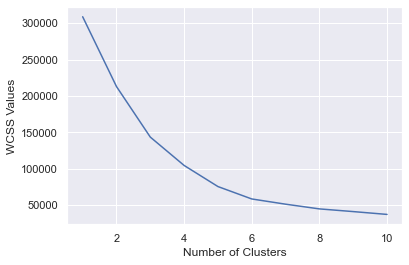

In [22]:
#elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

There were two points from where the WCSS value dropped significantly, 3 clusters and 5 clusters. These are the elbow points. After 5, there is no more significant change in value so 5 is the most suitable number of clusters

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 0)

In [29]:
y = kmeans.fit_predict(X)

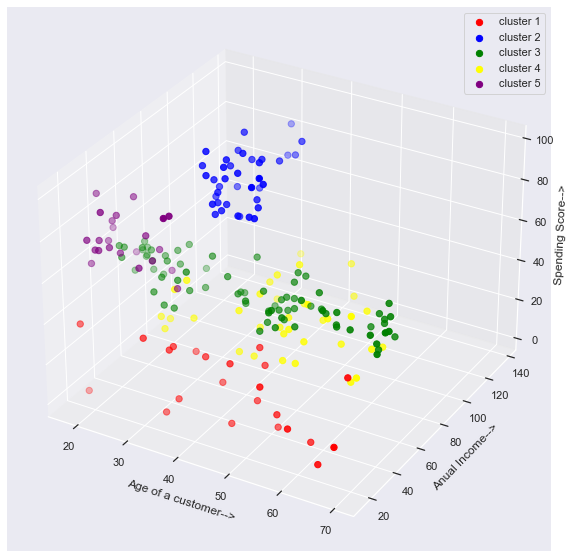

In [30]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1],X[y == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1],X[y == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1],X[y == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1],X[y == 3,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1],X[y == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()
